In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df_og = pd.read_feather('../../data/Doc_Con_Pre_sociodemo.feather')

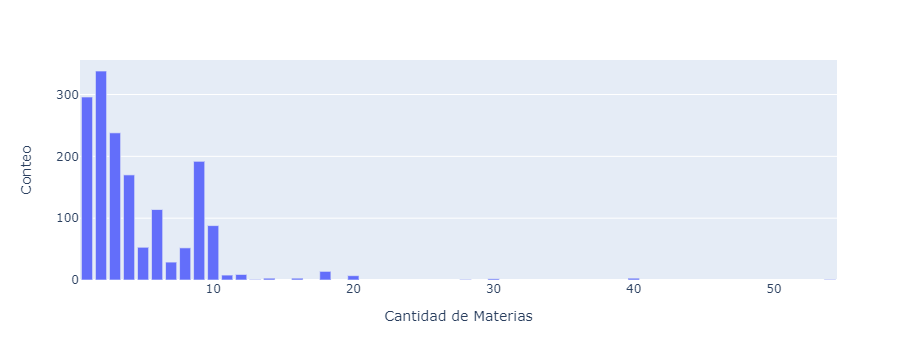

In [30]:
#  El profesor que enseña informática que otras materias enseña
df = df_og.copy()
cedulas = df_og[df_og['Clases'] == 'Tecnología e informática.']['ID'].unique()
materias = df.groupby(['ID'])['Clases'].size().reset_index() # Cantidad de materias que dan los profes
materias.columns = ['Cedula','Cantidad de Materias']
_df = materias.groupby(['Cantidad de Materias']).count().reset_index()
_df.columns = ['Cantidad de Materias','Conteo']
fig = px.bar(_df,x="Cantidad de Materias",y="Conteo")
fig.show()

In [14]:
# Promedio y moda de clases adicionales
cedulas = df_og[df_og['Clases'] == 'Tecnología e informática.']['ID'].unique()
materias = df.groupby(['ID'])['Clases'].size().reset_index() # Cantidad de materias que dan los profes
materias.columns = ['Cedula','Cantidad de Materias']
mean = materias['Cantidad de Materias'].mean()
mode = materias['Cantidad de Materias'].mode()
print(f'Mean: {mean}')
print(f'Mode: {mode[0]}')

Mean: 4.620838471023428
Mode: 2


In [64]:
# Promedio de la cuenta de los grados
cedulas = df_og[df_og['Clases'] == 'Tecnología e informática.']['ID'].unique()
df = df_og[df_og['ID'].isin(cedulas)]
# prom_grados = df['Grados'].cat.codes.mean()
prom_grados = df['Grados'].str.replace('°','').replace('Prescolar',0).astype(int).mean()
print(prom_grados)
# Nivel (PRIMARIA, SECUNDARIA, ETC)
prom_nivel = df['Nivel'].cat.codes.mean() # This is fucked


3.219054580896686
